# Quantum Machine Learning for Conspicuity Detection in Production #

Task 4 - (challenging sub-task) The goal of this subtask is to develop your own model and use it to learn the sine function on the interval [0, 2π]. Discretize the interval with a suitable number of points (of your choice) and use the values of the sine function at these discretization points as labels. Implement a Quantum Machine Learning model which reproduces the values of the sine function.

## part A : implementation ##

In [1]:
# Importing required libraries
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc

In [2]:
# Define the quantum device
num_qubits = 1
dev = qml.device('default.qubit', wires=num_qubits)

# Quantum circuit
@qml.qnode(dev)
def circuit(params, x):
    qml.RY(x, wires=0)
    qml.Rot(*params[0], wires=0)
    return qml.expval(qml.PauliZ(0))

In [3]:
# Cost function: mean squared error loss
def cost(params, x_values, y_values):
    predictions = np.array([circuit(params, x) for x in x_values])
    return np.mean((predictions - y_values)**2)

In [4]:
# Basic gradient descent optimizer
def train(steps, x_values, y_values):
    # Define an optimizer
    opt = qml.GradientDescentOptimizer(0.1)

    # Initialize parameters
    params = np.array([[0.0, 0.0, 0.0]])

    # Optimize the circuit
    cost_history = []
    param_history = []
    param_history.append(params.copy())
    for i in range(steps):
        params = opt.step(lambda p: cost(p, x_values, y_values), params)
        c = cost(params, x_values, y_values)
        cost_history.append(c)
        

        if (i + 1) % 10 == 0:
            print(f"Step {i + 1}, Cost: {c}")
            param_history.append(params.copy())
            

    return cost_history, param_history

In [5]:
# Training
N = 20
x_values = np.linspace(0, 2*np.pi, N)
y_values = np.sin(x_values)
steps = 200

cost_history, param_history = train(steps, x_values, y_values)

Step 10, Cost: 0.24288596557441453
Step 20, Cost: 0.030908059132832306
Step 30, Cost: 0.003426016590611438
Step 40, Cost: 0.00037338748809884507
Step 50, Cost: 4.061809324164194e-05
Step 60, Cost: 4.417647045037359e-06
Step 70, Cost: 4.804551938164047e-07
Step 80, Cost: 5.225330039607243e-08
Step 90, Cost: 5.682958001535528e-09
Step 100, Cost: 6.180664280313054e-10
Step 110, Cost: 6.721959024869631e-11
Step 120, Cost: 7.310659674986622e-12
Step 130, Cost: 7.950917981150986e-13
Step 140, Cost: 8.647249294763556e-14
Step 150, Cost: 9.404564454377651e-15
Step 160, Cost: 1.0228204179374234e-15
Step 170, Cost: 1.1123977261327877e-16
Step 180, Cost: 1.2098200800841572e-17
Step 190, Cost: 1.3157743923302849e-18
Step 200, Cost: 1.431009167841458e-19


In [6]:
# Animation function
def animate(i):
    params = param_history[i]
    predictions = np.array([circuit(params, x) for x in x_values])
    line.set_ydata(predictions)
    title.set_text(f'Step: {(i+1)*10}, Cost: {cost_history[i]:.6f}')
    return line, title

In [7]:
# Create a figure and axis

rc('animation', html='jshtml')
fig, ax = plt.subplots()
ax.plot(x_values, y_values, label='Actual sine function')
line, = ax.plot(x_values, np.zeros_like(x_values), 'o--', label='Predicted values')
title = ax.text(0.5, 1.05, "", transform=ax.transAxes, ha="center")
ax.set_xlabel('x')
ax.set_ylabel('sin(x)')
ax.legend()
ax.grid(True)

# Create the animation
ani = animation.FuncAnimation(fig, animate, frames=len(param_history), interval=100, blit=True)

plt.close(fig) # experimental

## part B : visualization and explaination ##

''

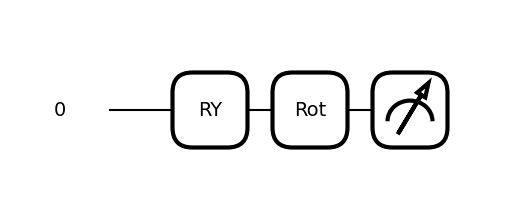

In [8]:
# visualizing quantum circuit
qml.draw_mpl(circuit)(param_history[-1],np.pi/2)
"""
input is a x value which is a scaler hence we need only one qbit to represent it
and for paramaterized circuit we need only 3 parameters to represent any unitary belongs to SU(2)

we use real amplitude embedding for taking x value as input for quantum circuit
we use rot(a,b,c) = RZ(a).RY(b).RZ(c) which can represent any matrix belonging to SU(2)
we return the expectation value of Pauli Z (projection) as output which is ideally near to respective y value
"""
;

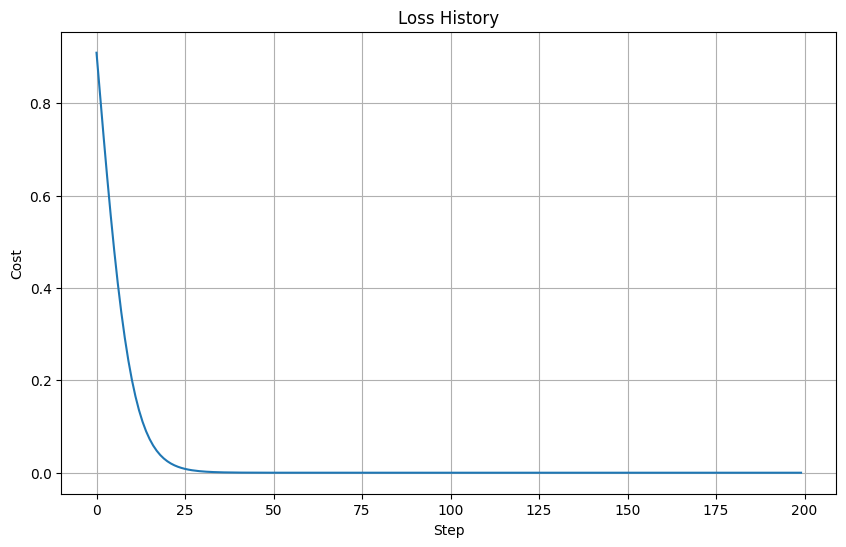

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(range(steps),cost_history)
plt.title('Loss History')
plt.xlabel('Step')
plt.ylabel('Cost')
plt.grid(True)
plt.show() # visualizing cost wrt no of steps

In [10]:


"""
we can observe that initiall we get cosine as our waveform but as 
our model trains the cosine changes phase such that it fits to our 
sine wave which is our desired function to fit
"""

ani # animation of quantum model learning the sine function 

In [11]:



"""
Here a,c = 0 and b = -1.57079633 that is b = -pi/2
which implies our circuit applies RY(-pi/2) to after embedding 'x' as real amplitude
which makes sense as it induces pi/2  phase difference in our initial output 
which is cosine that is sin(x) = cos(x - pi/2)

"""

param_history[-1] # understanding model by observing final params

tensor([[ 0.        , -1.57079633,  0.        ]], requires_grad=True)